In [28]:
import tensorflow as tf
import pandas
import sklearn
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Dropout

In [29]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [30]:
def print_Examples(x_train, y_train):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(x_train[i])
        plt.title("The label is " + str(y_train[i]))
        plt.axis("off")
        

In [31]:
def model(input_shape, num_classes,x_train, y_train,x_test,y_test, epochs):
    model = Sequential([ 
        layers.Rescaling(1./255, input_shape=input_shape), 
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)), 
        layers.Dropout(0.25), # Dropout layer
        layers.Conv2D(64, 1, padding='same', activation='relu'),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)), 
        layers.Dropout(0.25), # Dropout layer
        layers.Conv2D(64, 1, padding='same', activation='relu'), # 1x1 Convolution
        layers.Flatten(), 
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5), # Dropout layer
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5), # Dropout layer
        layers.Dense(num_classes, activation="softmax") 
    ]) 

    model.compile(optimizer='adam', 
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                metrics=['accuracy']) 

    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
    model.summary() 
    
    hist = model.fit(x_train,
    y_train,
    batch_size=32,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[checkpoint])
    
    
    return model,hist


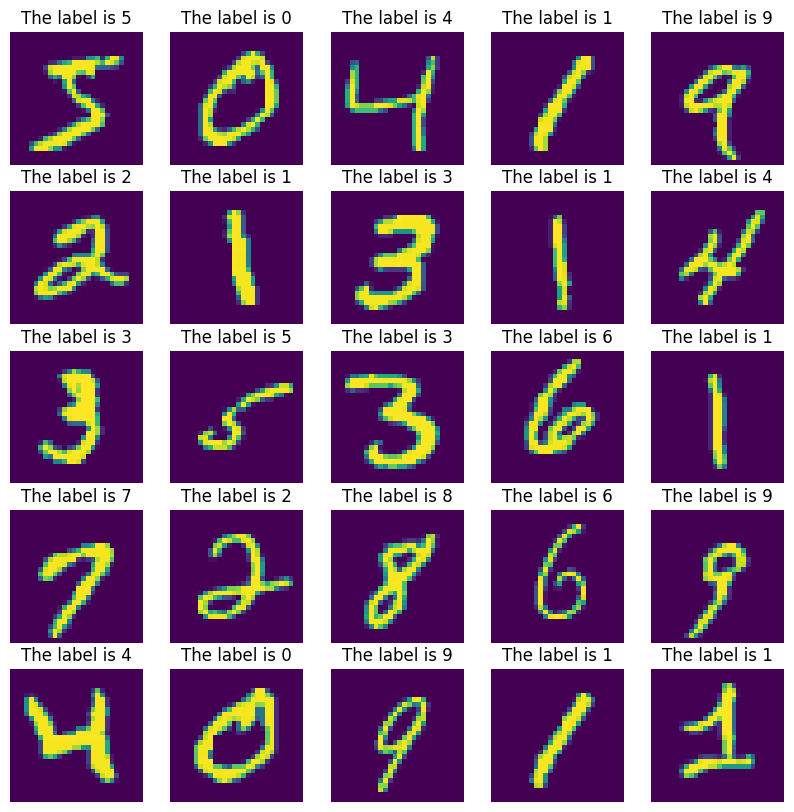

In [32]:
print_Examples(x_train, y_train)

In [33]:

epochs=50
model,hist = model((28,28,1), 10,x_train,y_train,x_test, y_test,epochs)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_12 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)       

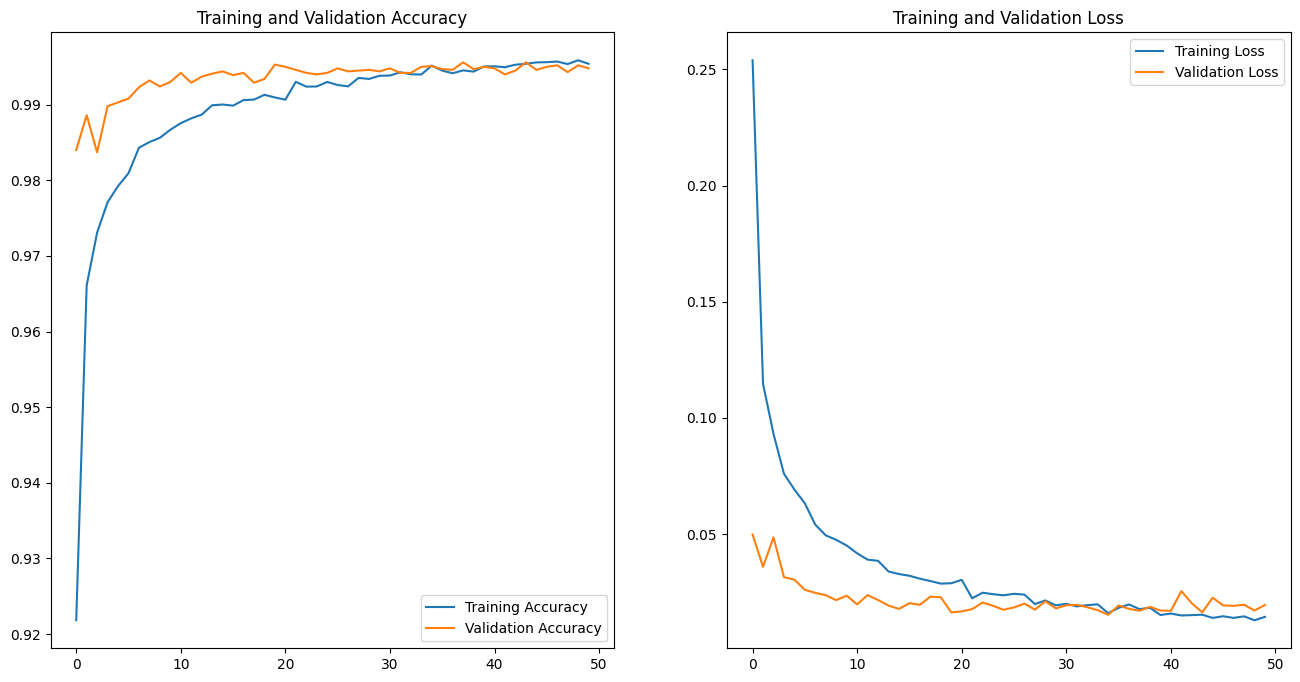

In [34]:
#Accuracy 
acc = hist.history['accuracy'] 
val_acc = hist.history['val_accuracy'] 

#loss 

loss = hist.history['loss'] 
val_loss = hist.history['val_loss'] 

#epochs 
epochs_range = range(len(acc))

#Plotting graphs 
plt.figure(figsize=(16, 8)) 
plt.subplot(1, 2, 1) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 

plt.subplot(1, 2, 2) 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.show() 


In [35]:
results = model.evaluate(x_test, y_test, batch_size=128)
results[1]

79/79 [==============================] - 0s 4ms/step - loss: 0.0195 - accuracy: 0.9948


0.9947999715805054

In [36]:
# model.save(f'model{results[1]}.h5',overwrite=True)

In [37]:
import os
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('best_model.h5')

# Evaluate the model to get the validation accuracy
val_loss, val_acc = model.evaluate(x_test, y_test)

# Rename the model file
os.rename('best_model.h5', f'model{val_acc}.h5')


313/313 [==============================] - 1s 3ms/step - loss: 0.0170 - accuracy: 0.9956
